In [1]:
%matplotlib

Using matplotlib backend: <object object at 0x10a3b6350>


In [29]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from scipy import stats

In [36]:
# Get the combined epochs to get the data in specific time window for statistics analysis
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"


#print(root_data_path)


"""
n_epoch_LDT = mne.read_epochs(meg_data_path / Path('009-016_LDT-merge-epo.fif'))
n_epoch_LDT.pick('mag')
#n_epoch_LDT = n_epoch_LDT.load_data().get_data()
#print(n_epoch_LDT)
print(len(n_epoch_LDT))

n_epoch_LDT.plot()
"""


tmp_sub_evoked_meanH_LIST = []
all_sub_evoked_meanH_LIST = []

tmp_sub_evoked_meanL_LIST = []
all_sub_evoked_meanL_LIST = []

for idINT in range(9, 17):
    sub_id = idINT
    
    # Load in the epochs of each subs
    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))   
    n_epoch_LDT.pick('mag')
    
    # Get the evoked responses from the epochs
    evoked_H = n_epoch_LDT["High_CD"].average()
    evoked_L = n_epoch_LDT["Low_CD"].average()
    
    # Get the data of certain time range of the evoked
    tmp_evoked_H = evoked_H.copy()
    tmp_evoked_L = evoked_L.copy()
    tmp_data_H_FLOAT = tmp_evoked_H.crop(0.4, 0.6).get_data().mean()
    tmp_data_L_FLOAT = tmp_evoked_L.crop(0.4, 0.6).get_data().mean()
    
    print("                         S%.3d_H" %sub_id, tmp_data_H_FLOAT)
    print("                         S%.3d_L" %sub_id, tmp_data_L_FLOAT)
    
    tmp_sub_evoked_meanH_LIST.extend([tmp_data_H_FLOAT])
    tmp_sub_evoked_meanL_LIST.extend([tmp_data_L_FLOAT])
    
    print("                                                   HEREEEEEE!!", len(tmp_sub_evoked_meanH_LIST))
    print("                                                   HEREEEEEE!!", len(tmp_sub_evoked_meanL_LIST))
    
    #all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)
    

Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
                         S009_H 4.7292713598508676e-15
                         S009_L 5.365011651073145e-15
                                                   HEREEEEEE!! 1
                                                   HEREEEEEE!! 1
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S010_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
113 matching events f

In [37]:
print(tmp_sub_evoked_meanH_LIST)
print(tmp_sub_evoked_meanL_LIST)

[4.7292713598508676e-15, -1.8274402958928282e-14, -1.6369928130117645e-15, -6.8537545038031156e-15, -2.5485200534926034e-15, -6.40627683044989e-15, 8.267246529968708e-15, 2.145290928156925e-15]
[5.365011651073145e-15, 7.956663265589718e-15, -8.452600738722267e-16, -5.089446360061521e-15, -2.9688901206989095e-15, 5.705173321456472e-16, 1.89916642347495e-14, 1.4950672000148292e-15]


In [38]:
evoked_meanH_Array = np.array(tmp_sub_evoked_meanH_LIST)
print(len(evoked_meanH_Array))
evoked_meanL_Array = np.array(tmp_sub_evoked_meanL_LIST)
print(len(evoked_meanL_Array))

pair_ttest_CD = stats.ttest_rel(evoked_meanH_Array, evoked_meanL_Array)
print(pair_ttest_CD)
#print(type(pair_ttest_CD))

8
8


In [13]:
#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

evoked_H.save(meg_data_path / Path('009-016_LDT-evoked_H-ave.fif'), overwrite=True)
evoked_L.save(meg_data_path / Path('009-016_LDT-evoked_L-ave.fif'), overwrite=True)

In [20]:
# Testing to get the data of certain time range of the evoked
tmp_evoked_H = evoked_H.copy()

time_range = [0.4, 0.6]
tmp_data_H_FLOAT = tmp_evoked_H.crop(0.4, 0.6).get_data().mean()

print(type(tmp_data_H))
#print(len(tmp_data_H))
print(tmp_data_H)

tmp_evoked_L = evoked_L.copy()

time_range = [0.4, 0.6]
tmp_data_L = tmp_evoked_L.crop(0.4, 0.6).get_data().mean()

print(type(tmp_data_L))
#print(len(tmp_data_L))
print(tmp_data_L)

<class 'numpy.float64'>
-2.4216944718549158e-15
<class 'numpy.float64'>
3.1644483288812377e-15


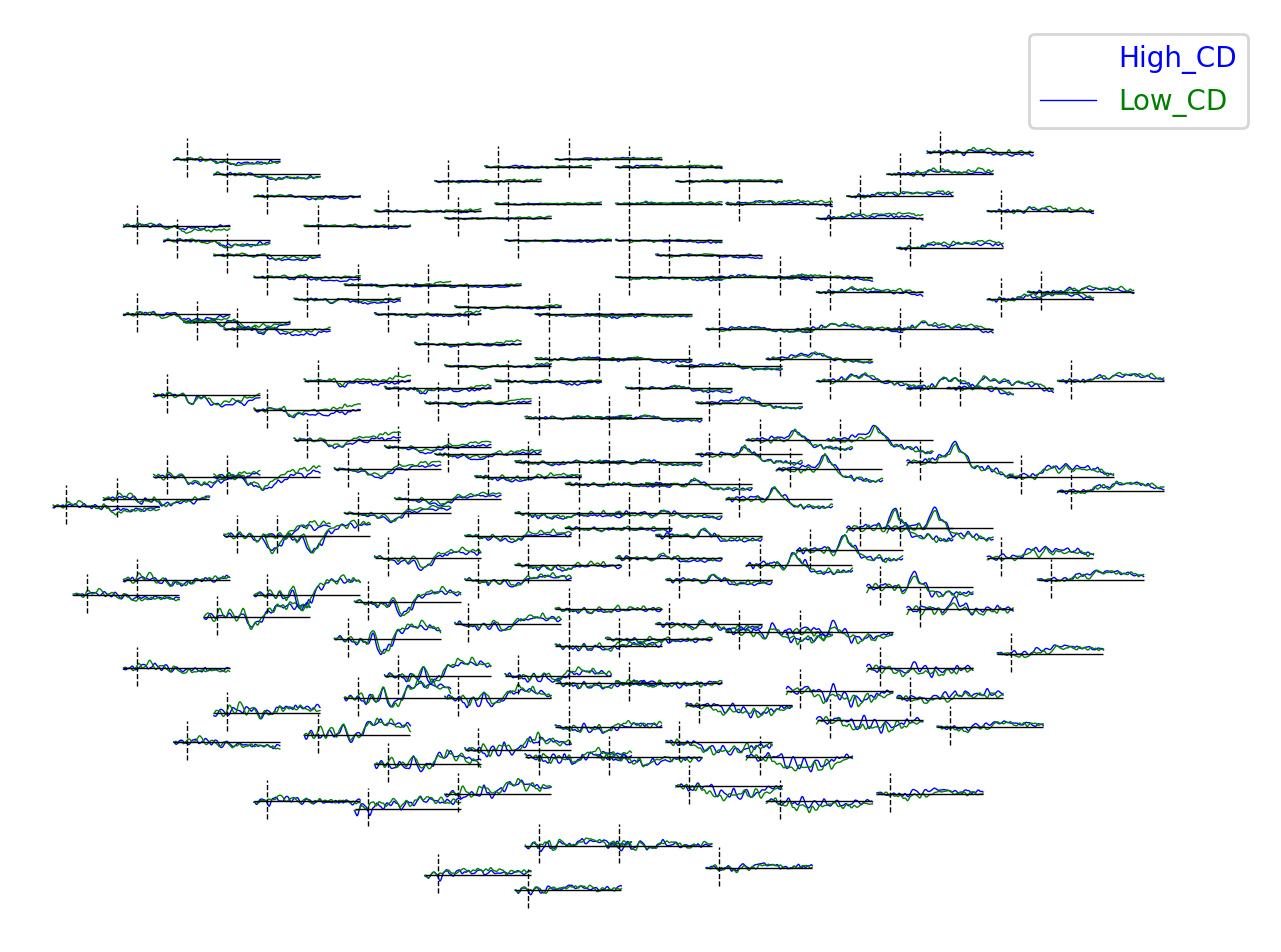

In [12]:
#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [4]:
## TESTING LOOP
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

#meg_data_path = Path("/Users/ting-hsin/Downloads/TMP_File_forIRB")

#print(root_data_path)

tmp_sub_epochsLIST = []
all_sub_epochsLIST = []

for idINT in range(9, 17):
    sub_id = idINT

    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
    #n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

    #print(n_epoch_LDTfile.info)
    n_epoch_LDT.pick('mag')
    tmp_sub_epochsLIST.extend([n_epoch_LDT])
    all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)
all_sub_epochsLIST

Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S010_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
233 matching events found
Applying baseline

Number of events,952
Events,Control: 476High_CD: 237Low_CD: 239
Time range,-0.100 – 0.700 sec
Baseline,-0.100 – 0.000 sec


In [20]:
all_sub_epochsLIST.save(meg_data_path / Path('009-016_LDT-merge-epo.fif'), overwrite=True)

Overwriting existing file.


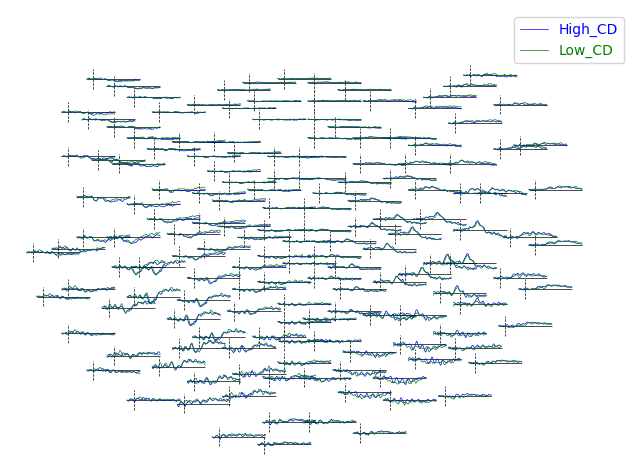

In [6]:
# To see the average evoked of every participants so far

#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [11]:
# Plot the joint
#mne.viz.plot_compare_evokeds(tmp, picks='mag')
H_minus_L = mne.combine_evoked([evoked_H, evoked_L], weights=[1, -1])
H_minus_L.plot_joint()
plt.savefig(meg_data_path / Path('H-minus-L_evoked.png'), overwrite=True)

# Plot the specific times
times = np.linspace(0.05, 0.650, 13)
H_minus_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('H-minus-L_evoked_topomap.png'), overwrite=True)

No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/2689659872.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('H-minus-L_evoked.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/2689659872.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('H-minus-L_evoked_topomap.png'), overwrite=True)


In [12]:
#evoked_C = n_epoch_LDT["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

times = np.linspace(0.05, 0.45, 9)
#evoked_C.plot_topomap(ch_type='mag', times=times, colorbar=True)
evoked_H.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('HCD-evoked_topomap.png'), overwrite=True)
evoked_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('LCD-evoked_topomap.png'), overwrite=True)

/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3194938901.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('HCD-evoked_topomap.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3194938901.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('LCD-evoked_topomap.png'), overwrite=True)


In [9]:
# Check the resluts of some channel
# MEG 043最大/ MEG 048_跟046一樣小/ MEG 045 ＝ MEG 044＿比046大一點/ MEG 046_小/ MEG 047_比046小

mne.viz.plot_compare_evokeds(tmp, picks='MEG 043')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 044')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 045')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 048')

[<Figure size 800x600 with 2 Axes>]

In [9]:
MEG_043_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 043')
plt.savefig(meg_data_path / Path('MEG_043_evoked.png'), overwrite=True)

<ipython-input-9-c53f7bf7337c>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(meg_data_path / Path('MEG_043_evoked.png'), overwrite=True)


In [13]:
evoked_H.plot_joint()
plt.savefig(meg_data_path / Path('HCD-evoked_joint.png'), overwrite=True)
evoked_L.plot_joint()
plt.savefig(meg_data_path / Path('LCD-evoked_joint.png'), overwrite=True)

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3550134059.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('HCD-evoked_joint.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3550134059.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('LCD-evoked_joint.png'), overwrite=True)
